Input Image Shape: (28, 28)

Output Shape:
 (3, 26, 26)

 Convolued output Feature map [[[-285. -239.  300. ... -110. -136.   80.]
  [  -6.  -21.  -19. ... -247.  146. -272.]
  [ 144.  118. -130. ... -238.  128. -404.]
  ...
  [-288.   58. -113. ... -101.  244.   47.]
  [-398.  364.  190. ...  379.   -1.   25.]
  [-310.  278.  347. ...  246.  -47.   23.]]

 [[ 137.  359.  410. ...   40.  206.  322.]
  [-138.  137.  -15. ...  -49.  -70. -256.]
  [ 134.  148.  328. ... -494. -482. -446.]
  ...
  [-444. -254.  175. ...  139.  314.   95.]
  [-670. -664. -484. ... -161. -101. -149.]
  [ 118.  114.    5. ...  136. -103. -103.]]

 [[ 110. -489.  175. ... -529.   -4. -423.]
  [ 578. -181.  492. ...  371.   33.  729.]
  [-696.  362. -527. ... -531.   57. -242.]
  ...
  [ -55.  471.  -37. ...  344. -157.  295.]
  [  -5. -651.  660. ...   45.   76.   16.]
  [-331.   85. -351. ...  -17.  276. -515.]]]

 Output Shape after max pooling
 (3, 13, 13)

 Output after max pooling [[[  -6.  300.  277.  48

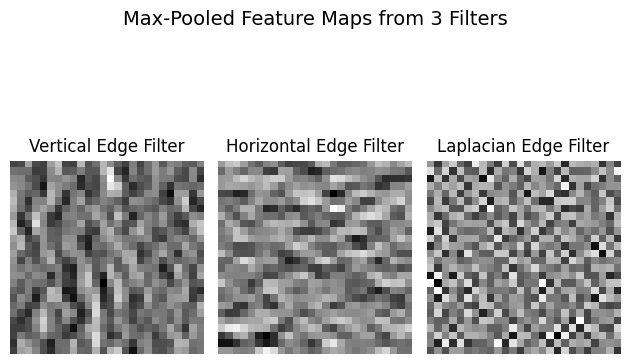

In [18]:
# CNN with 1 layer Input and multiple filters
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# Step 1: Initialize the input image in vector numerical value,
# Input size 28x28x1 Matrix of Greyscale image value,
# Kernel size 3x3x3 Matrix, Stride of 1(default size)
# Output size 3X26x26 matrix, output = (input - kernel)//stride+1 with 3 kernels
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)
image = np.random.randint(0, 256, (28, 28))
kernel = np.array([
    [[-1, 0, 1],   # Vertical Filter
     [-2, 0, 2],
     [-1, 0, 1]],

    [[-1, -2, -1],  # Horizontal Filter
     [0,  0,  0],
     [1,  2,  1]],

    [[0, -1, 0],    # Laplacian Filter
     [-1, 4, -1],
     [0, -1, 0]]
])
num_filters, ker_h, ker_w = kernel.shape
output = np.zeros((num_filters, 26, 26))
print("Input Image Shape:", image.shape)
for k in range(num_filters):
  kernel_k = kernel[k] # Selecting the 3 Kernel filters on loop
  for i in range(26): # Range(26) is the output feature map
    for j in range(26):
      region = image[i:i+ker_h , j:j+ker_w]
      output[k, i, j] = np.sum(region * kernel_k)
print("\nOutput Shape:\n", output.shape)
print("\n Convolued output Feature map", output)
# Step 2:  Find the maximum value from each max pool region to reduce the complexity
# max pool layer 2x2 Matrix, Stride 2 steps, Output = 13x13 matrix
max_pool_layer = 2
max_pool_stride = 2
pool_output =  ((output.shape[1] - max_pool_layer) // max_pool_stride) + 1
out_pool = np.zeros((output.shape[0], pool_output, pool_output))
for k in range(3): # Each loop with range(3) selects the one dimension form previous output of 3D matrix
  output_k = output[k]
  for i in range(pool_output):
    for j in range(pool_output):
      # Max pool layer is 2x2 matrix and it convolves the feature map 2 slides every loop and find the maximum value
      region = output_k[i*max_pool_stride:i*max_pool_stride+2, j*max_pool_stride:j*max_pool_stride+2]
      out_pool[k,i,j] = np.max(region)
print("\n Output Shape after max pooling\n", out_pool.shape)
print("\n Output after max pooling", out_pool)
# Step 3: Flatten the max pool output and initialize the weight and bias to find the final output
flattened_value = out_pool.flatten()
print("\nFlattened Size:", flattened_value.shape)
weights = np.random.randn(10, flattened_value.shape[0])
print("\n Weight shape:", weights.shape)
biases = np.random.randn(10)
print("\n Bias shape:", biases.shape)
final_output = np.dot(weights, flattened_value) + biases
print("\nFully Connected Output (10 classes):\n", final_output)
prob_output = softmax(final_output)
print("\nClass Probabilities after Softmax:\n", prob_output)

titles = ['Vertical Edge Filter', 'Horizontal Edge Filter', 'Laplacian Edge Filter']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.suptitle("Max-Pooled Feature Maps from 3 Filters", fontsize=14)
plt.tight_layout()
plt.show()